In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('C:/Users/Raj/Downloads/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.shape

(150, 6)

In [4]:
data['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [6]:
data.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [7]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
X=data.drop(['Id','Species'],axis=1)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
y=data['Species']
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [10]:
from sklearn.model_selection import train_test_split

In [123]:
x_train,x_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.3,random_state=42)

In [124]:
from sklearn.neighbors import KNeighborsClassifier

In [125]:
import numpy as np

In [126]:
k=np.arange(2,30)
train_accuracy=np.empty(len(k))
test_accuracy=np.empty(len(k))
for i,k in enumerate(k):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy[i]=knn.score(x_train,y_train)
    test_accuracy[i]=knn.score(x_test,y_test)
    print(train_accuracy[i])
    print(test_accuracy[i])

0.9904761904761905
0.9111111111111111
0.9619047619047619
0.9555555555555556
0.9809523809523809
0.9555555555555556
0.9714285714285714
0.9777777777777777
0.9619047619047619
0.9555555555555556
0.9714285714285714
0.9555555555555556
0.9714285714285714
0.9333333333333333
0.9714285714285714
0.9555555555555556
0.9714285714285714
0.9555555555555556
0.9714285714285714
0.9333333333333333
0.9714285714285714
0.9333333333333333
0.9809523809523809
0.9333333333333333
0.9619047619047619
0.9333333333333333
0.9809523809523809
0.9555555555555556
0.9809523809523809
0.9555555555555556
0.9809523809523809
0.9555555555555556
0.9523809523809523
0.9555555555555556
0.9714285714285714
0.9555555555555556
0.9428571428571428
0.9333333333333333
0.9619047619047619
0.9555555555555556
0.9619047619047619
0.9333333333333333
0.9619047619047619
0.9555555555555556
0.9714285714285714
0.9333333333333333
0.9809523809523809
0.9333333333333333
0.9714285714285714
0.9555555555555556
0.9619047619047619
0.9333333333333333
0.9714285714

In [127]:
import matplotlib.pyplot as plt

In [128]:
k=np.arange(2,30)
k

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

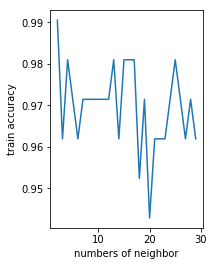

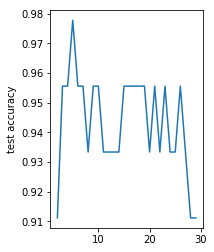

In [129]:
plt.subplot(1,2,1)
plt.plot(k,train_accuracy)
plt.xlabel('numbers of neighbor')
plt.ylabel('train accuracy')
plt.show()
plt.subplot(1,2,2)
plt.plot(k,test_accuracy)
plt.ylabel('test accuracy')
plt.show()

In [130]:
idx=np.where(test_accuracy==max(test_accuracy))
x=k[idx]
x

array([5])

In [131]:
model=KNeighborsClassifier(n_neighbors=5)

In [132]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [106]:
y_pred=model.predict(x_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor'], dtype=object)

In [107]:
y_test

107     Iris-virginica
63     Iris-versicolor
133     Iris-virginica
56     Iris-versicolor
127     Iris-virginica
140     Iris-virginica
53     Iris-versicolor
69     Iris-versicolor
20         Iris-setosa
141     Iris-virginica
14         Iris-setosa
38         Iris-setosa
108     Iris-virginica
116     Iris-virginica
28         Iris-setosa
148     Iris-virginica
57     Iris-versicolor
10         Iris-setosa
23         Iris-setosa
18         Iris-setosa
97     Iris-versicolor
7          Iris-setosa
75     Iris-versicolor
104     Iris-virginica
138     Iris-virginica
51     Iris-versicolor
84     Iris-versicolor
93     Iris-versicolor
66     Iris-versicolor
35         Iris-setosa
134     Iris-virginica
132     Iris-virginica
85     Iris-versicolor
49         Iris-setosa
111     Iris-virginica
40         Iris-setosa
42         Iris-setosa
2          Iris-setosa
43         Iris-setosa
77     Iris-versicolor
55     Iris-versicolor
22         Iris-setosa
106     Iris-virginica
147     Iri

In [108]:
from sklearn.metrics import confusion_matrix

In [109]:
confusion_matrix(y_test,y_pred)

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]], dtype=int64)

In [110]:
pd.crosstab(y_test,y_pred)

col_0,Iris-setosa,Iris-versicolor,Iris-virginica
Species,,,
Iris-setosa,15,0,0
Iris-versicolor,0,15,0
Iris-virginica,0,1,14


In [111]:
from sklearn.metrics import accuracy_score

In [112]:
accuracy_score(y_test,y_pred)

0.9777777777777777

In [133]:
from sklearn.model_selection import cross_val_score

In [137]:
scores=cross_val_score(model,X,y,cv=10)
scores

array([1.        , 0.93333333, 1.        , 1.        , 0.86666667,
       0.93333333, 0.93333333, 1.        , 1.        , 1.        ])

In [138]:
scores.mean()

0.9666666666666668

In [139]:
from sklearn.metrics import classification_report

In [140]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.93      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [142]:
a=data.iloc[[16,99,145],1:5]
a

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
16,5.4,3.9,1.3,0.4
99,5.7,2.8,4.1,1.3
145,6.7,3.0,5.2,2.3


In [143]:
model.predict(a)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [144]:
b=pd.DataFrame({'SepalLengthCm':[5.369],'SepalWidthCm':[3.125],'PetalLengthCm':[3.987],'PetalWidthCm':[0.7598]})

In [145]:
b

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.369,3.125,3.987,0.7598


In [147]:
c=np.array([[5.369,3.125,3.987,0.789]])

In [146]:
model.predict(b)

array(['Iris-versicolor'], dtype=object)

In [148]:
c

array([[5.369, 3.125, 3.987, 0.789]])

In [149]:
model.predict(c)

array(['Iris-versicolor'], dtype=object)